Reading the data

In [0]:
import numpy as np
import pandas as pd
from google.colab import files

In [0]:
url = "https://raw.githubusercontent.com/reubence/Google-DSC-Workshop-2020/master/datasets/yolo.csv"

In [0]:
data = pd.read_csv(url)

In [0]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


EDA

In [0]:
data.drop(["PassengerId", "Name", "Ticket", "Cabin"], 1, inplace = True)

In [0]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [0]:
data.isnull().mean() * 100

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Embarked     0.224467
dtype: float64

In [0]:
data['Age'] = data['Age'].fillna(data['Age'].median())
data.dropna(inplace=True)

In [0]:
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [0]:
for row in data:
  data["Family"] = data.SibSp + data.Parch + 1

In [0]:
data.drop(["SibSp", "Parch"], 1, inplace=True)

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

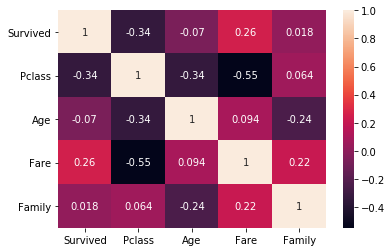

In [0]:
sns.heatmap(data.corr(), annot = True)

Text(0.5, 1.0, 'Did not Survive')

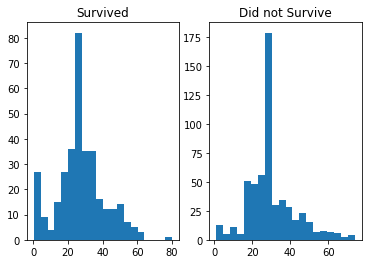

In [0]:
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.hist(data.Age[data.Survived == 1], bins = 20)
ax1.set_title("Survived")
ax2.hist(data.Age[data.Survived == 0], bins = 20)
ax2.set_title("Did not Survive")

In [0]:
data.Sex[data.Survived == 0].value_counts()

male      468
female     81
Name: Sex, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


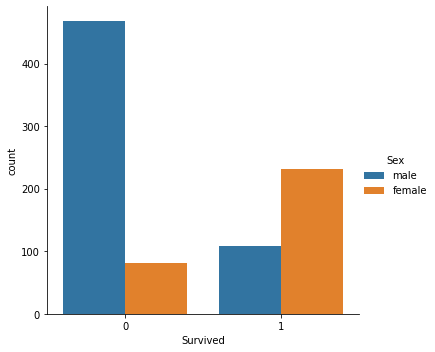

In [0]:
sns.factorplot('Survived',data=data,hue='Sex',kind='count')

In [0]:
data.Pclass[data.Survived == 1].value_counts()

1    134
3    119
2     87
Name: Pclass, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


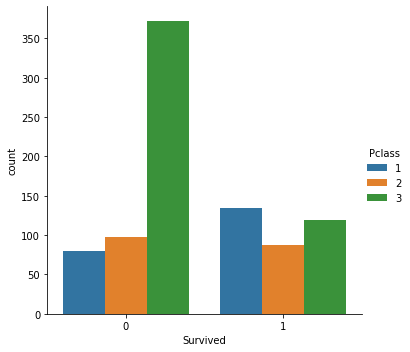

In [0]:
sns.factorplot('Survived',data=data,hue='Pclass',kind='count')

In [0]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Family'], dtype='object')

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
label = LabelEncoder()

In [0]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


In [0]:
data.Sex.value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [0]:
data.Sex = label.fit_transform(data.Sex)
data.Embarked = label.fit_transform(data.Embarked)

{'boxes': [<matplotlib.lines.Line2D at 0x7fc693e6fdd8>],
 'caps': [<matplotlib.lines.Line2D at 0x7fc693e7c668>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc693e86080>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fc693e7ccf8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fc693e6ff28>,
  <matplotlib.lines.Line2D at 0x7fc693e7c320>]}

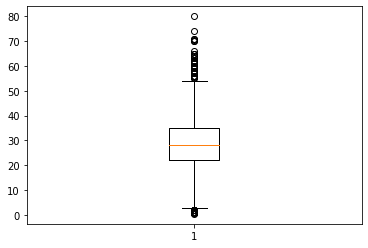

In [0]:
plt.boxplot(data["Age"])

In [0]:
from scipy import stats

In [0]:
z = np.abs(stats.zscore(data)) # z score is the relation between sd and mean

In [0]:
data = data[(z < 1.5).all(axis=1)]

{'boxes': [<matplotlib.lines.Line2D at 0x7fc693e5d940>],
 'caps': [<matplotlib.lines.Line2D at 0x7fc693deb1d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc693debba8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fc693deb860>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fc693e5da90>,
  <matplotlib.lines.Line2D at 0x7fc693e5de48>]}

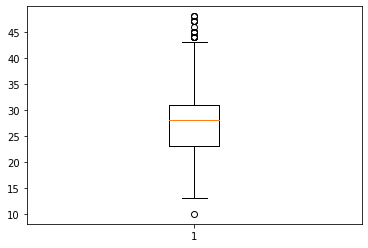

In [0]:
plt.boxplot(data["Age"]) # after removing outliers

In [0]:
data_new = pd.get_dummies(data = data, columns = ["Pclass", "Family", "Embarked"])

In [0]:
data_new.head()

,Survived,Sex,Age,Fare,Pclass_2,Pclass_3,Family_1,Family_2,Family_3,Family_4,Embarked_1,Embarked_2
0,0,1,22.0,7.2500,0,1,0,1,0,0,0,1
2,1,0,26.0,7.9250,0,1,1,0,0,0,0,1
4,0,1,35.0,8.0500,0,1,1,0,0,0,0,1
5,0,1,28.0,8.4583,0,1,1,0,0,0,1,0
8,1,0,27.0,11.1333,0,1,0,0,1,0,0,1


In [0]:

X = data_new.drop(["Survived"],1)
Y = data_new.Survived

In [0]:
from sklearn.model_selection import train_test_split as tts

In [0]:
X_train, X_test, Y_train, Y_test = tts(X, Y, test_size = 0.2, random_state = 42)

Handling imbalanced data

In [0]:
train = pd.concat([X_train, Y_train], 1)

In [0]:
Y_train.value_counts()

0    278
1    105
Name: Survived, dtype: int64

Oversampling

In [0]:
from sklearn.utils import resample

In [0]:
zero = train[train.Survived==0]
one = train[train.Survived==1]

In [0]:
one_upsampled = resample(one,
                          replace=True, # have to make duplicates
                          n_samples=len(zero),
                          random_state=27) 

In [0]:
upsampled = pd.concat([zero, one_upsampled])

In [0]:
upsampled.Survived.value_counts()

1    278
0    278
Name: Survived, dtype: int64

Undersampling

In [0]:
zero_downsampled = resample(zero,
                            replace = False, # sample without replacement
                            n_samples = len(one), # match minority n
                            random_state = 27) # reproducible results

In [0]:
downsampled = pd.concat([zero_downsampled, one])

In [0]:
downsampled.Survived.value_counts()

1    105
0    105
Name: Survived, dtype: int64

SMOTE

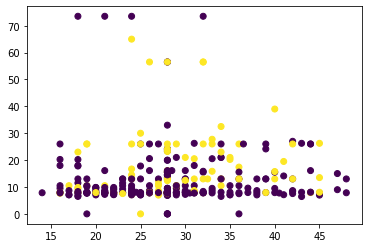

In [0]:
plt.scatter(X_train["Age"], X_train["Fare"], c = Y_train)

In [0]:
from imblearn.over_sampling import SMOTE

In [0]:
sm = SMOTE(random_state=2)

In [0]:
X_sm, Y_sm = sm.fit_sample(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
X_train.columns

Index(['Sex', 'Age', 'Fare', 'Pclass_2', 'Pclass_3', 'Family_1', 'Family_2',
       'Family_3', 'Family_4', 'Embarked_1', 'Embarked_2'],
      dtype='object')

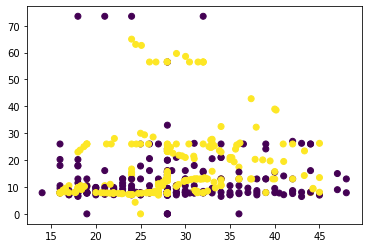

In [0]:
plt.scatter(X_sm[:, 1], X_sm[:, 2], c = Y_sm)

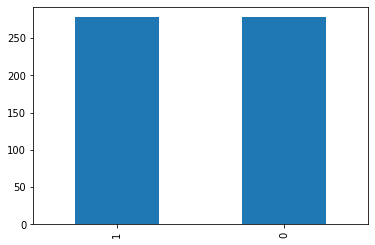

In [0]:
pd.value_counts(Y_sm).plot.bar()

In [0]:
X_train = upsampled.drop(["Survived"], 1)
Y_train = upsampled.Survived

Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
log = LogisticRegression()

In [0]:
log.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
Y_pred = log.predict(X_test)
Y_pred

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0])

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [0]:
confusion_matrix(Y_test, Y_pred)

array([[55, 12],
       [ 6, 23]])

In [0]:
accuracy_score(Y_test, Y_pred)

0.8125

In [0]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        67
           1       0.66      0.79      0.72        29

    accuracy                           0.81        96
   macro avg       0.78      0.81      0.79        96
weighted avg       0.83      0.81      0.82        96



SVM

In [0]:
from sklearn.svm import SVC

In [0]:
svc = SVC(kernel="linear") # linear, poly, rbf

In [0]:
svc.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
Y_svm = svc.predict(X_test)

In [0]:
confusion_matrix(Y_test, Y_svm)

array([[55, 12],
       [ 6, 23]])

In [0]:
accuracy_score(Y_test, Y_svm)

0.8125

In [0]:
print(classification_report(Y_test, Y_svm))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        67
           1       0.66      0.79      0.72        29

    accuracy                           0.81        96
   macro avg       0.78      0.81      0.79        96
weighted avg       0.83      0.81      0.82        96



KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
knn = KNeighborsClassifier(n_neighbors=5)

In [0]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
Y_knn = knn.predict(X_test)

In [0]:
confusion_matrix(Y_test, Y_knn)

array([[47, 20],
       [ 9, 20]])

In [0]:
accuracy_score(Y_test, Y_knn)

0.6979166666666666

In [0]:
print(classification_report(Y_test, Y_knn))

              precision    recall  f1-score   support

           0       0.84      0.70      0.76        67
           1       0.50      0.69      0.58        29

    accuracy                           0.70        96
   macro avg       0.67      0.70      0.67        96
weighted avg       0.74      0.70      0.71        96



Linear regression

In [0]:
X1 = data_new.drop(["Fare"],1)
Y1 = data_new.Fare

In [0]:
from sklearn.model_selection import train_test_split as tts

In [0]:
X_train1, X_test1, Y_train1, Y_test1 = tts(X1, Y1, test_size = 0.2, random_state = 42)

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
lin = LinearRegression(normalize=True)

In [0]:
lin.fit(X_train1, Y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [0]:
Y_pred1 = lin.predict(X_test1)

In [0]:
from sklearn.metrics import r2_score

In [0]:
r2_score(Y_test1, Y_pred1)

0.38909936040220316

Decision Tree Classifier

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
tree = DecisionTreeClassifier()

In [0]:
tree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
Y_tree = tree.predict(X_test)

In [0]:
confusion_matrix(Y_test, Y_tree)

array([[59,  8],
       [ 8, 21]])

In [0]:
accuracy_score(Y_test, Y_tree)

0.8333333333333334

In [0]:
print(classification_report(Y_test, Y_tree))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        67
           1       0.72      0.72      0.72        29

    accuracy                           0.83        96
   macro avg       0.80      0.80      0.80        96
weighted avg       0.83      0.83      0.83        96



Random Forest Classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
random = RandomForestClassifier()

In [0]:
random.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
Y_random = random.predict(X_test)

In [0]:
confusion_matrix(Y_test, Y_random)

array([[59,  8],
       [ 7, 22]])

In [0]:
accuracy_score(Y_test, Y_random)

0.84375

In [0]:
print(classification_report(Y_test, Y_random))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89        67
           1       0.73      0.76      0.75        29

    accuracy                           0.84        96
   macro avg       0.81      0.82      0.82        96
weighted avg       0.85      0.84      0.84        96

